In [12]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [13]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/웹개발.csv',encoding = 'utf-8')
df

주요 업무  \
0    사용기술Java C C Python 산업용 장비 데이터베이스 구축 및 서버관리데이터 운영   
1     신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...   
2     전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring   ...   
3     Flutter 기반 네이티브 앱 개발 윈도우 어플리케이션 개발 Google Pla...   
4     자사 호스팅클라우드 웹 서비스 개발 및 유지보수PHP 웹 서비스고도화PHP 프로젝...   
..                                                 ...   
275   뉴로핏 제품의 웹프론트엔드 신규 개발 및 유지 보수 리포트 템플릿 제작 디자인 시...   
276  PC모바일웹뷰 환경의 프론트엔드 개발을 담당해요목표를 위해 기획자 디자이너 개발자가...   
277  새로운 멤버를 찾게 된 배경에 대해서 말씀 드려요백앤드 개발자는 모던 아키텍트 개발...   
278   기존 쇼핑몰 사이트 PHP laravel 기반 리버스 엔지니어링 및 eCommer...   
279  자사 웹앱 서비스 개발기존 플랫폼 기능 개선 및 추가 기능 개발서비스의 API 및 ...   

                                           자격요건 및 우대사항  
0     학력 대졸 이상 전공 컴퓨터공학과 소프트웨어과 등 경력자인 경우 프로젝트 진행이 ...  
1     Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...  
2     JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...  
3     C CPP Flutter 언어 중 최소 2개 개발 경력 5년 이상 Native 어...  
4     경력 3년 7년 Modern PHP  PSR 개발 Laravel framework...  
..                                                 ...  
275   유관업무 경력 5년 이상 HTML CSS 및 Javascript 생태계에 이해가 ...  
276  TDDATDD의 개념과 적용에 무리가 없는 분4년 이상의 개발 경력이 있거나 이에 ...  
277  이에요 벡앤드 개발 5년 이상의 경력을 가진 분포괄적인 IoT 서비스의 구조에 대해...  
278   학력 대졸 이상 총 8년 이상의 PHP  Java 기반 애플리케이션 개발 경험 5...  
279  프론트엔드 React React Native백엔드 Nodejs NodeNestjs배...  

[280 rows x 2 columns]

In [14]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

자격요건 및 우대사항
0     학력 대졸 이상 전공 컴퓨터공학과 소프트웨어과 등 경력자인 경우 프로젝트 진행이 ...
1     Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
2     JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...
3     C CPP Flutter 언어 중 최소 2개 개발 경력 5년 이상 Native 어...
4     경력 3년 7년 Modern PHP  PSR 개발 Laravel framework...
..                                                 ...
275   유관업무 경력 5년 이상 HTML CSS 및 Javascript 생태계에 이해가 ...
276  TDDATDD의 개념과 적용에 무리가 없는 분4년 이상의 개발 경력이 있거나 이에 ...
277  이에요 벡앤드 개발 5년 이상의 경력을 가진 분포괄적인 IoT 서비스의 구조에 대해...
278   학력 대졸 이상 총 8년 이상의 PHP  Java 기반 애플리케이션 개발 경험 5...
279  프론트엔드 React React Native백엔드 Nodejs NodeNestjs배...

[280 rows x 1 columns]

In [15]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/웹개발(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [16]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 학력 대졸 이상 전공 컴퓨터공학과 소프트웨어과 등 경력자인 경우 프로젝트 진행이 가능한 개발언어JAVACCPython 능력 보유자 프론트엔드 및 백엔드 등 웹개발 경험 네트워크 구축 및 시스템 구축 신재생에너지 및 장비제어 관련 경력자 공공기관 프로젝트 경험\n Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Cloud front S3 등 프로젝트 PLPM 등 수행 및 업무 시스템 구축 경험 테크니컬 분석설계 역량 AndroidIOS 개발 경험 네이티브 플러터 리액트 네이티브 등 모바일 크로스 플랫폼 관련 경험 서브 능력 Python JS RDB 개발 경험 Flask Django Vuejs MariaDBMySQL 사용 혹은 관련 겅험 관련 경력자\n JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 빅데이터AI 분야 업계 종사 경력 앱 및 웹 개발 경력\n C CPP Flutter 언어 중 최소 2개 개발 경력 5년 이상 Native 어플리케이션 개발 경험 Json 기반 Socket 데이터 통신 이해 가능한 분 GitHub GitLab BitBucket등 분산 버전 관리 환경에서 개발 익숙하신 분 키오스크 분야 개발 경험 보유자 Serial TCPIP 통신 기반 장치제어 어플리케이션 경험자 스타트업 경험자 및 진취적 열정을 가진 사람 데이터 통신 프로토콜에 대한 이해도가 높은 사람\n 경력 3년 7년 Modern PHP  PSR 개발 Laravel framework 개발 React 자바스크립트 개발 RESTful API 설계 및 개발 SVN  Git 운영 DB 설계 및 관리 SW 개발 보안시큐어 코딩 경험 조직관리 경험자 관련 학과 전공 또는 교육 이수자 호스팅  클라우드  컨테이너 시스템 이해 및 경험자 CI  CD 운영 또는 구축 경험자 ISMS  CSAP 등 인증관련 경험자 OSLinux  Network 시스템 이해 및 경험자초대졸 이상 또는 졸업예정자해외여행에 결격사유가

In [17]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '학력',
 '대졸',
 '이상',
 '전공',
 '컴퓨터공학',
 '소프트웨어',
 '등',
 '경력',
 '경우',
 '프로젝트',
 '진행',
 '개발',
 '언어',
 '능력',
 '보유',
 '프론트엔드',
 '및',
 '백엔드',
 '등',
 '웹',
 '개발',
 '경험',
 '네트워크',
 '구축',
 '및',
 '시스템',
 '구축',
 '신재생에너지',
 '및',
 '장비',
 '제어',
 '관련',
 '경력',
 '공공기관',
 '프로젝트',
 '경험',
 '개발',
 '및',
 '운영',
 '경험',
 '등',
 '프로젝트',
 '등',
 '수행',
 '및',
 '업무',
 '시스템',
 '구축',
 '경험',
 '테크니컬',
 '분석',
 '설계',
 '역량',
 '개발',
 '경험',
 '네이티',
 '브',
 '플러터',
 '리액트',
 '네이티',
 '브',
 '등',
 '모바일',
 '크로스',
 '플랫폼',
 '관련',
 '경험',
 '서브',
 '능력',
 '개발',
 '경험',
 '사용',
 '관련',
 '겅험',
 '관련',
 '경력',
 '안드로이드',
 '앱',
 '개발',
 '웹',
 '개발',
 '프로토콜',
 '설계',
 '등',
 '분야',
 '별',
 '능통',
 '핀',
 '테크',
 '빅데이터',
 '분야',
 '업계',
 '종사',
 '경력',
 '앱',
 '및',
 '웹',
 '개발',
 '경력',
 '언어',
 '중',
 '최소',
 '개',
 '개발',
 '경력',
 '이상',
 '어플리케이션',
 '개발',
 '경험',
 '기반',
 '데이터',
 '통신',
 '이해',
 '분',
 '등',
 '분산',
 '버전',
 '관리',
 '환경',
 '개발',
 '분',
 '키',
 '오스',
 '분야',
 '개발',
 '경험',
 '보유',
 '통신',
 '기반',
 '장치',
 '제어',
 '어플리케이션',
 '경험',
 '스타트업',
 '

In [18]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

14150
1067


FreqDist({'분': 1280, '경험': 1137, '개발': 836, '및': 442, '대한': 301, '등': 292, '이해': 267, '이상': 246, '경력': 222, '서비스': 175, ...})

In [19]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [20]:
stop_words = [
   '문제', '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '학력',
 '대졸',
 '전공',
 '컴퓨터공학',
 '소프트웨어',
 '경우',
 '프로젝트',
 '진행',
 '언어',
 '프론트엔드',
 '백엔드',
 '웹',
 '네트워크',
 '구축',
 '시스템',
 '구축',
 '신재생에너지',
 '장비',
 '제어',
 '공공기관',
 '프로젝트',
 '운영',
 '프로젝트',
 '수행',
 '시스템',
 '구축',
 '테크니컬',
 '분석',
 '설계',
 '역량',
 '네이티',
 '브',
 '플러터',
 '리액트',
 '네이티',
 '브',
 '모바일',
 '크로스',
 '플랫폼',
 '서브',
 '겅험',
 '안드로이드',
 '앱',
 '웹',
 '프로토콜',
 '설계',
 '분야',
 '별',
 '능통',
 '핀',
 '테크',
 '빅데이터',
 '분야',
 '업계',
 '종사',
 '앱',
 '웹',
 '언어',
 '중',
 '최소',
 '개',
 '어플리케이션',
 '데이터',
 '통신',
 '분산',
 '버전',
 '관리',
 '키',
 '오스',
 '분야',
 '통신',
 '장치',
 '제어',
 '어플리케이션',
 '스타트업',
 '진취',
 '열정',
 '사람',
 '데이터',
 '통신',
 '프로토콜',
 '사람',
 '자바스크립트',
 '설계',
 '운영',
 '설계',
 '관리',
 '보안',
 '큐어',
 '코딩',
 '조직',
 '관리',
 '학과',
 '전공',
 '교육',
 '이수자',
 '호스팅',
 '클라우드',
 '컨테이너',
 '시스템',
 '운영',
 '구축',
 '인증',
 '시스템',
 '자초',
 '대졸',
 '졸업',
 '예정자',
 '해외여행',
 '결격',
 '사유',
 '자',
 '로봇공학',
 '로봇',
 '제어',
 '학과',
 '석사',
 '프로그램',
 '직접',
 '이력',
 '시스템',
 '내외',
 '고객',
 '의사소통',
 '내외',
 '컨설팅',
 '유',
 '프론트',
 '백엔드',
 '웹',
 '서

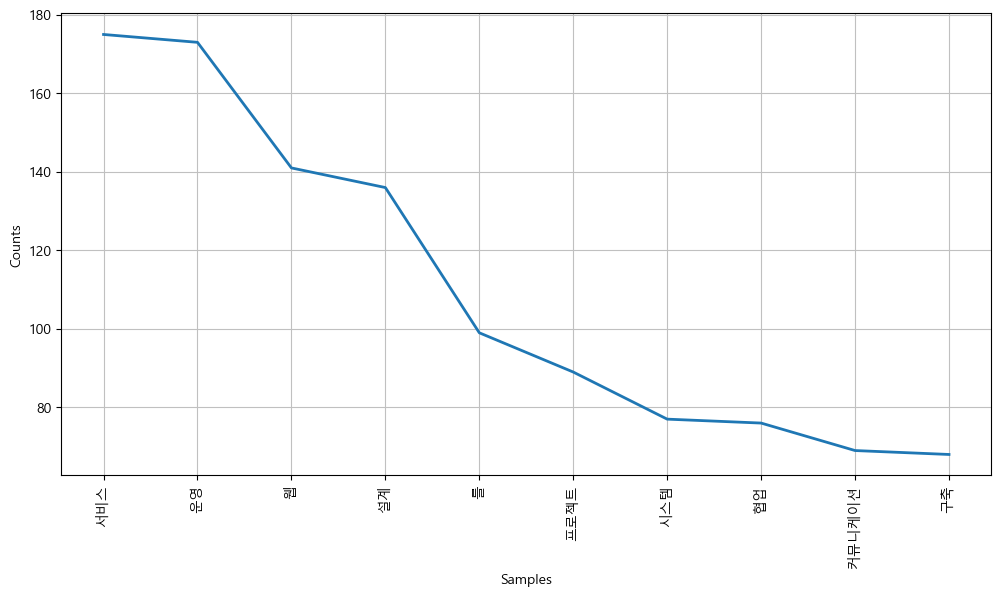

In [21]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

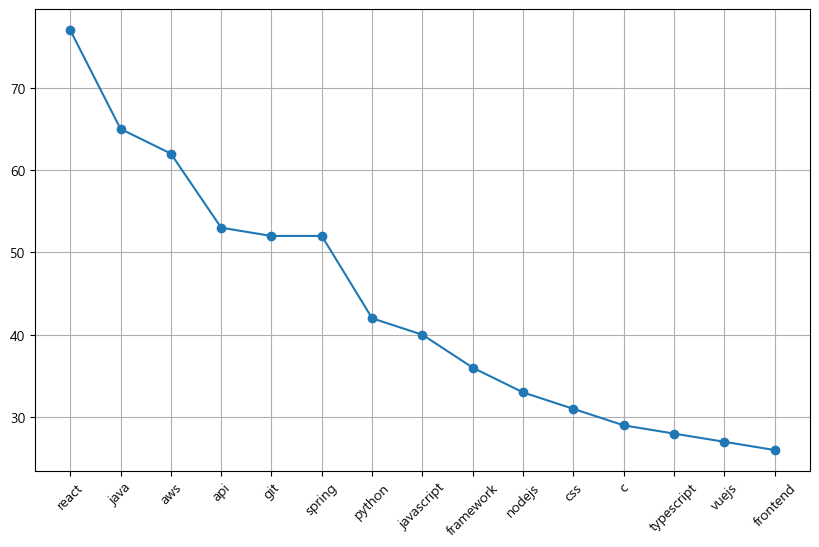

In [29]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','rest']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)